<a href="https://colab.research.google.com/github/shyamjith94/OpencvImagemanipulation/blob/main/2_4_1_Gemetric_trasfroms_PIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png  

In [2]:
image_lenna = "lenna.png"
image_baboon = "baboon.png"
image_barbara = "barbara.png"

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [4]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)

    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

##Geometric Transformations

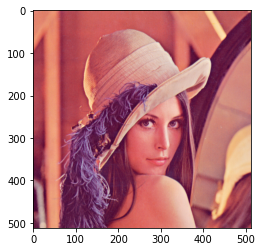

In [5]:
image = Image.open(image_lenna)
plt.imshow(image)
plt.show()

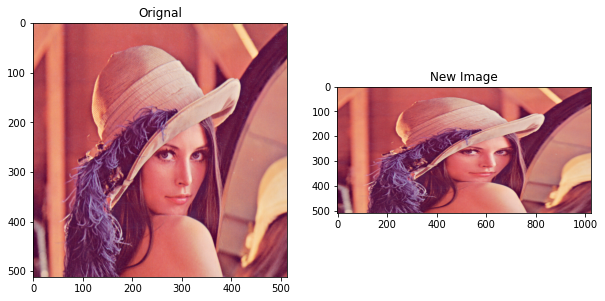

In [6]:
width, height = image.size
new_width = 2*width
new_height = height
new_image = image.resize((new_width, new_height))
plot_image(image, new_image)

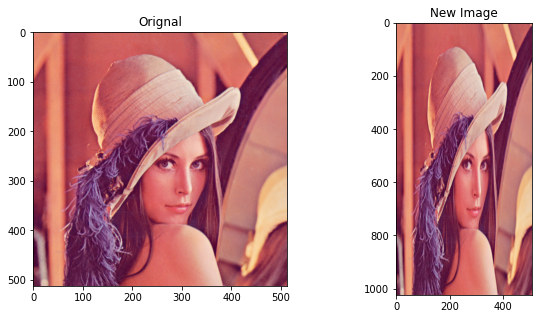

In [7]:
width, height = image.size
new_width = width
new_height = 2*height
new_image = image.resize((new_width, new_height))

plot_image(image, new_image)

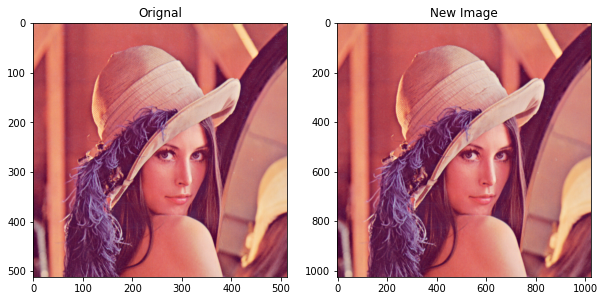

In [8]:
# scale the vertical axis by two
new_width = 2 * width
new_hight = 2 * height
new_image = image.resize((new_width, new_hight))

plot_image(image, new_image)


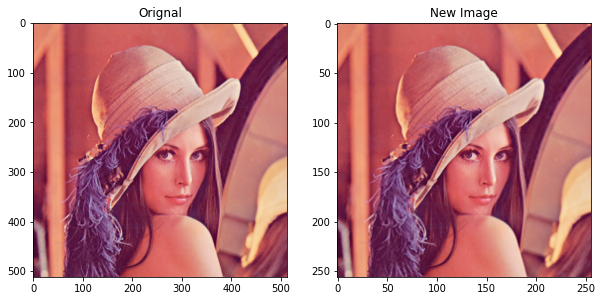

In [9]:
# shrink image
new_width = width // 2
new_hight = height // 2

new_image = image.resize((new_width, new_hight))
plot_image(image, new_image)

##Rotation

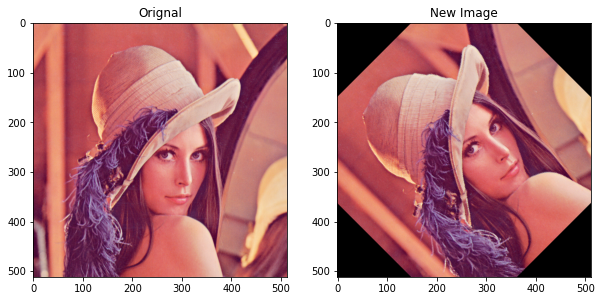

In [10]:
theta = 45
new_image = image.rotate(theta)
plot_image(image, new_image)

##Mathematical Operations

In [11]:
image = np.array(image)

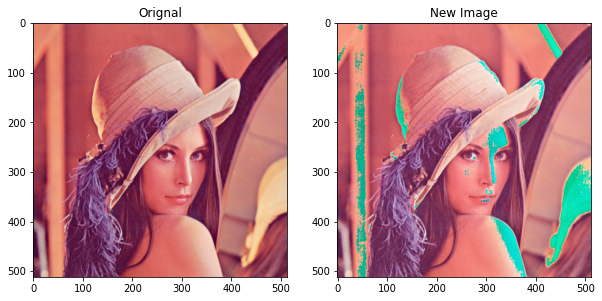

In [12]:
# add constant value to image
new_image = image + 20
plot_image(image, new_image)

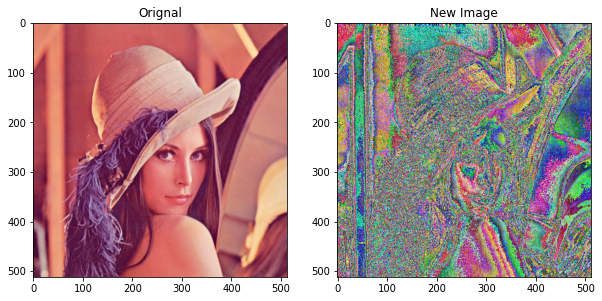

In [13]:
# multiply with image pixel
new_image = 10 * image
plot_image(image, new_image)

In [15]:
# we generate an array of random noises with the same shape and data type as our image.
noise = np.random.normal(0, 20, (height, width, 3)).astype(np.uint8)
noise.shape

(512, 512, 3)

In [16]:
image.shape

(512, 512, 3)

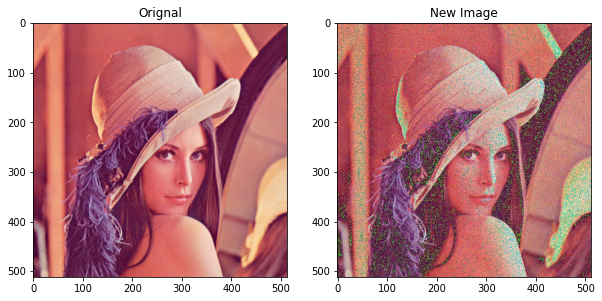

In [18]:
new_image = image + noise
plot_image(image, new_image)

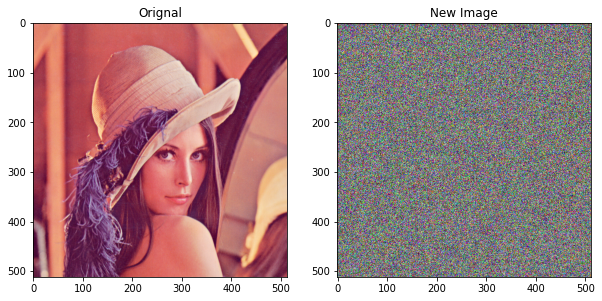

In [19]:
new_image = image * noise
plot_image(image, new_image)

##Matrix Operations

In [52]:
img_gray = Image.open(image_baboon)

In [53]:
from PIL import ImageOps

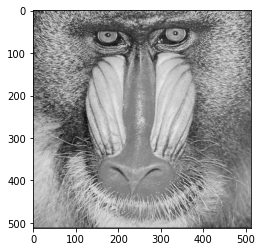

In [54]:
img_gray = ImageOps.grayscale(img_gray)
img_gray = np.array(img_gray)
plt.imshow(img_gray, cmap="gray")
plt.show()

In [55]:
#We can use Singular Value Decomposition, decomposing our image matrix into a product of three matrices.
U, s, V = np.linalg.svd(img_gray , full_matrices=True)

In [60]:
# We can convert s to a diagonal matrix S
S = np.zeros((img_gray.shape[0], img_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)


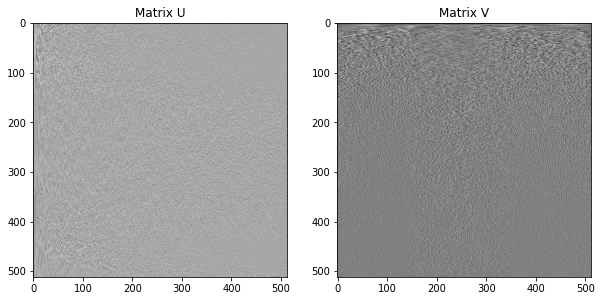

In [61]:
plot_image(U, V, title_1="Matrix U", title_2="Matrix V")

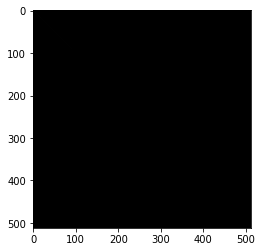

In [62]:
plt.imshow(S, cmap='gray')
plt.show()

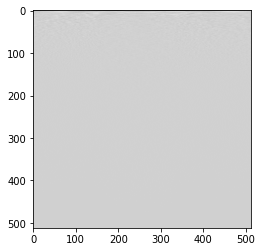

In [63]:
B = S.dot(V)
plt.imshow(B,cmap='gray')
plt.show()

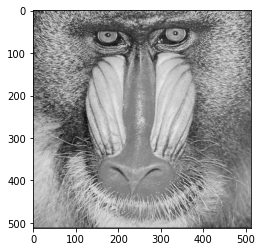

In [64]:
A = U.dot(B)
plt.imshow(A,cmap='gray')
plt.show()

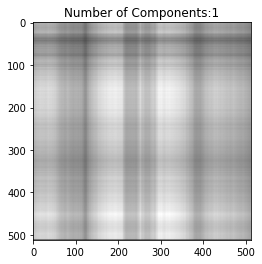

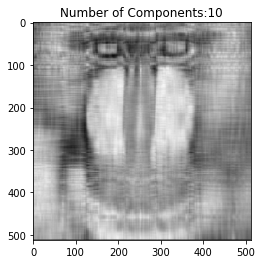

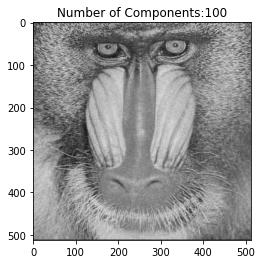

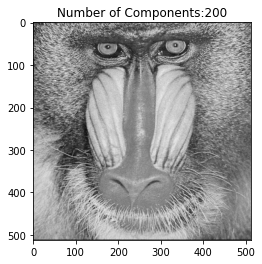

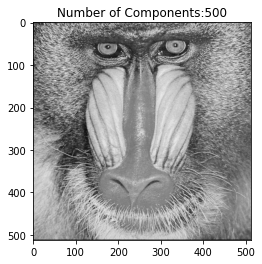

In [65]:
# . We can eliminate some rows and columns of S and V and approximate the image by finding the product:
for n_component in [1,10,100,200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()